In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
customer = pd.read_csv(r'Documents\sowmiya\Python\Python Foundation Case Study 1 - Retail Case Study\Customer.csv')

In [3]:
customer=customer.rename(columns={'customer_Id':'cust_id'})

In [4]:
transactions=pd.read_csv(r'Documents\sowmiya\Python\Python Foundation Case Study 1 - Retail Case Study\Transactions.csv')

In [5]:
prod_cat=pd.read_csv(r'Documents\sowmiya\Python\Python Foundation Case Study 1 - Retail Case Study\prod_cat_info.csv')

In [43]:
prod_cat=prod_cat.rename(columns={'prod_sub_cat_code':'prod_subcat_code'})


In [7]:
trans_cust=transactions.merge(customer,on='cust_id',how='left')

In [136]:
Customer_Final=trans_cust.merge(prod_cat,on=['prod_cat_code','prod_subcat_code'])
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
2,73713102191,268867,15-02-2014,1,1,1,714,74.970,788.970,MBR,24-10-1987,F,4.0,Clothing,Women
3,57134739558,270625,14-02-2014,1,1,5,595,312.375,3287.375,TeleShop,03-02-1992,M,6.0,Clothing,Women
4,79536458466,271944,12/2/2014,1,1,2,996,209.160,2201.160,e-Shop,11-12-1971,F,5.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,31795262740,275166,1/2/2011,1,4,4,531,223.020,2347.020,e-Shop,05-11-1970,M,10.0,Bags,Mens
23049,85848725285,271131,1/2/2011,1,4,5,1043,547.575,5762.575,e-Shop,02-07-1976,F,9.0,Bags,Mens
23050,12933894691,272706,31-01-2011,1,4,5,361,189.525,1994.525,MBR,09-03-1974,M,8.0,Bags,Mens
23051,6442732971,273698,30-01-2011,1,4,1,1470,154.350,1624.350,e-Shop,06-06-1974,F,1.0,Bags,Mens


# Get the column names and their corresponding data types

In [9]:
Customer_Final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
DOB                  object
Gender               object
city_code           float64
prod_cat             object
prod_subcat          object
dtype: object

# Top/Bottom 10 observation

In [21]:
Customer_Final.head(10)
Customer_Final.tail(10)

# “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [35]:
#city_code is in float but not continous , we cannot say city_code in float 
#meanwhile Rate is in int , but it can be converted to float and consider as continous 
Customer_Final['Rate']=Customer_Final.Rate.astype(np.float64)
Customer_Final.describe().loc[['min','max','25%','50%','75%'],['Tax','total_amt','Rate']]


,Tax,total_amt,Rate
min,7.350,-8270.925,-1499.0
max,787.500,8287.500,1500.0
25%,98.280,762.450,312.0
50%,199.080,1754.740,710.0
75%,365.715,3569.150,1109.0


In [153]:
#Changing the  dob to datetime formate
Customer_Final['DOB']=pd.to_datetime(Customer_Final.DOB,format='%d-%m-%Y')
#Changing the  tran_date to datetime formate
Customer_Final['tran_date']=pd.to_datetime(Customer_Final.tran_date,format='%d-%m-%Y',errors="coerce").fillna(pd.to_datetime(Customer_Final.tran_date,format='%d/%m/%Y',errors="coerce"))
#coerce failure will be NaN,using filna we are using other formate

In [154]:
#date type after convertion
Customer_Final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
prod_cat                    object
prod_subcat                 object
is_negative                  int32
dtype: object

# d. Frequency tables for all the categorical variable

In [72]:
Categorical_var=Customer_Final.select_dtypes(include='object')

for i in Categorical_var:
    table =pd.crosstab(categorical_var[i],'no of products')
    print(table)


# frequency bars for categorical variables

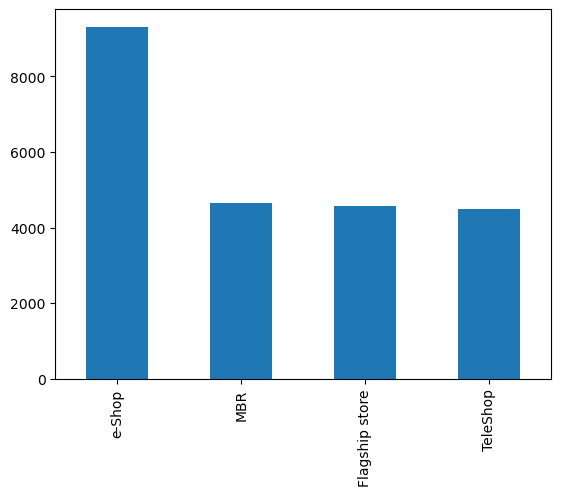

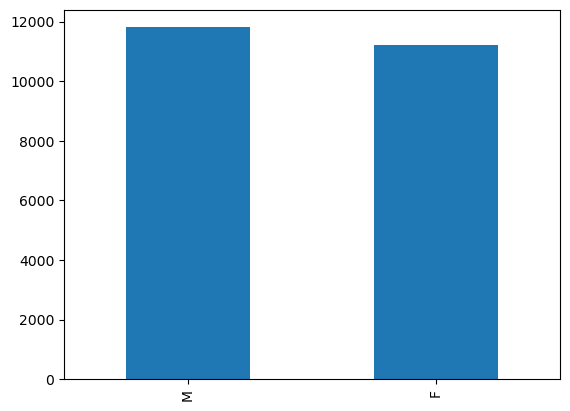

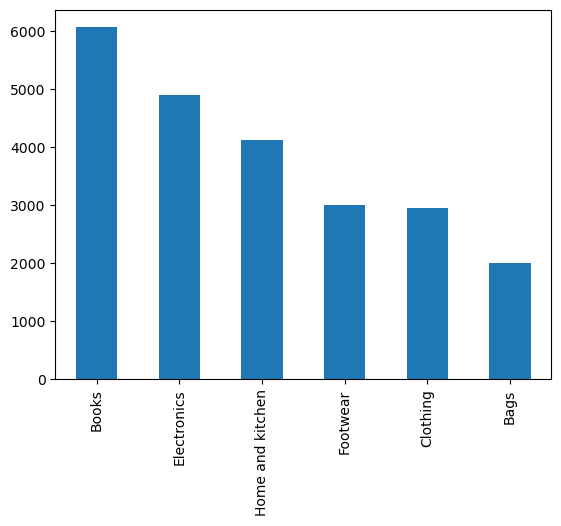

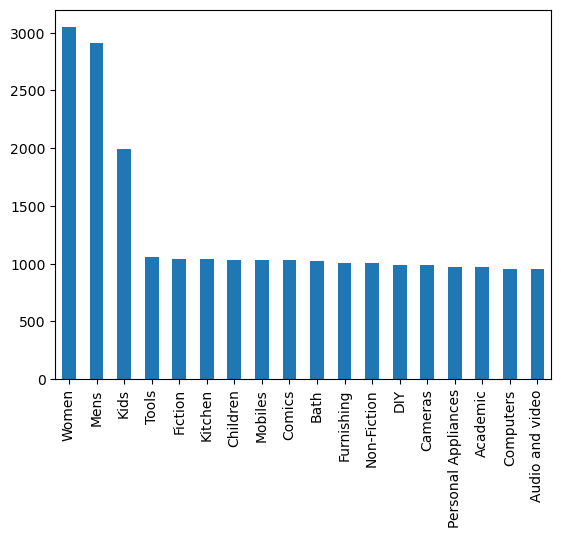

In [77]:
for i in Categorical_var:
    Categorical_var[i].value_counts().plot(kind='bar')
    plt.show()
    

# Generate histograms for all continuous variables 

Tax


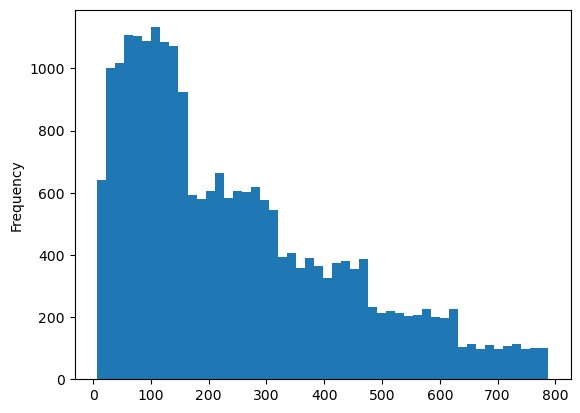

Rate


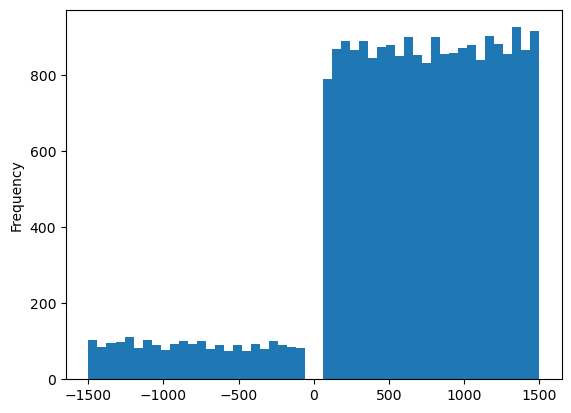

total_amt


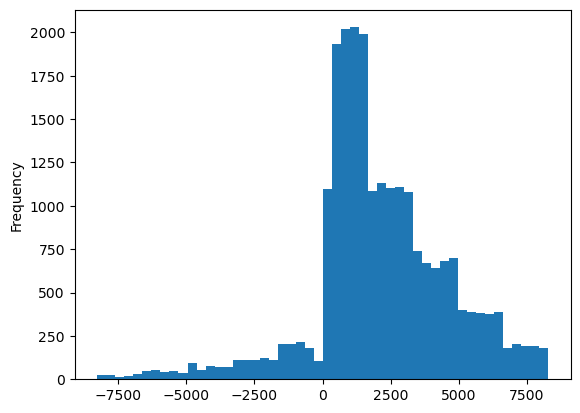

In [41]:

Contionus_var = ['Tax','Rate','total_amt']
for i in Contionus_var:
    print(i)
    Customer_Final[i].plot(kind='hist',bins=50)
    plt.show()
    

# Calculate the following information using the merged dataset :
a. Time period of the available transaction data

In [86]:
Time_period=Customer_Final.tran_date.max() - Customer_Final.tran_date.min()
print(Time_period)
print("time period of transaction date is between")
print(Customer_Final.tran_date.min(),Customer_Final.tran_date.max())


1130 days 00:00:00
time period of transaction date is between
2011-01-25 00:00:00 2014-02-28 00:00:00


# Count of transactions where the total amount of transaction was negative

In [13]:
len(Customer_Final.index[Customer_Final.total_amt < 0])

2177

# Analyze which product categories are more popular among females vs male customers.


In [14]:
Customer_Final.pivot_table(index='prod_cat',columns='Gender',values='Qty',aggfunc='sum')
#Electronics 
#male purchase more electronics then women

Gender,F,M
prod_cat,,
Bags,2362,2346
Books,7070,7587
Clothing,3425,3748
Electronics,5832,6476
Footwear,3716,3555
Home and kitchen,4895,5041


# Which City code has the maximum customers and what was the percentage of customers from that city?



In [102]:
city_max_customer=Customer_Final.pivot_table(index='city_code',values='cust_id',aggfunc=len).sort_values(by='cust_id',ascending=False).head(1)
total_customer=Customer_Final.pivot_table(index='city_code',values='cust_id',aggfunc=len).sort_values(by='cust_id',ascending=False).sum()
city_max_customer['percentage']=(city_max_customer.iloc[0,0]/total_customer[0])*100
city_max_customer

#check how to find total in this

,cust_id,percentage
city_code,,
4.0,2422,10.509872


# Which store type sells the maximum products by value and by quantity?

In [132]:
Customer_Final.pivot_table(index='Store_type',values=['Qty','Rate'],aggfunc=sum).sort_values(by=['Qty','Rate'],ascending=False).head(1)


,Qty,Rate
Store_type,,
e-Shop,22763,5941001


# What was the total amount earned from the "Electronics" and "Clothing" categories from 
#Flagship Stores?

In [131]:

x=Customer_Final.pivot_table(values='total_amt',index='Store_type',columns='prod_cat',aggfunc=sum).reset_index()
y=x[(x.Store_type =='Flagship store')]
y['Electronics']+y['Clothing']

0    3409559.27
dtype: float64

# What was the total amount earned from "Male" customers under the "Electronics" category?

In [133]:
male_cus=Customer_Final.pivot_table(values='total_amt',index='prod_cat',columns='Gender',aggfunc='sum')

In [134]:
male_cus.loc['Electronics','M']

5703109.425

# How many customers have more than 10 unique transactions, after removing all transactions 
which have any negative amounts?


In [140]:
Customer_Final['is_negative']=np.where(Customer_Final.total_amt>0,1,0)

In [141]:
trans_more10=Customer_Final.pivot_table(values='is_negative',index='cust_id',aggfunc=sum).sort_values(by='is_negative',ascending=False)

In [142]:
trans_more10

,is_negative
cust_id,
272741,11
273014,11
266794,11
274227,11
270803,11
...,...
267660,1
268491,1
267242,1


In [143]:
len(trans_more10.index[trans_more10.is_negative > 10])

6

# For all customers aged between 25 - 35, find out:
 a. What was the total amount spent for “Electronics” and “Books” product categories?


In [157]:
from datetime import date as dt
Customer_Final['Age']=dt.today().year-Customer_Final.DOB.dt.year


In [182]:
spent_bt=Customer_Final.pivot_table(values='total_amt',index='Age',columns=['prod_cat'],aggfunc=sum)
spent_bt=spent_bt.reset_index()
y=spent_bt[(spent_bt['Age'] >= 25) & (spent_bt['Age']<=35)]
y['Electronics'].sum()+y['Books'].sum()


6058003.380000001

#  What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [194]:
amt_spent=Customer_Final.loc[( ((Customer_Final['tran_date'] >= '01-01-2014') & (Customer_Final['tran_date'] <= '03-01-2014'))& ((Customer_Final.Age >= 25) & (Customer_Final.Age <=35))) ,['total_amt']]

In [195]:
amt_spent.sum()

total_amt    653925.74
dtype: float64